# Ex6

In [1]:
%matplotlib inline

In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV

## Part 1: Loading and Visualizing Data

Loading and Visualizing Data ...

In [3]:
def plot_data(X, y):
    pos = np.where(y == 1)
    neg = np.where(y == 0)
    plt.plot(X[pos,0], X[pos,1], 'k+', linewidth=1, markersize=7)
    plt.plot(X[neg,0], X[neg, 1], 'ko', markerfacecolor='y', markersize=7);

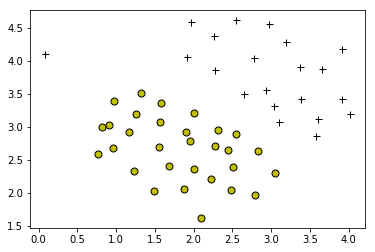

In [4]:
data = sio.loadmat('ex6data1.mat', squeeze_me=True)
X = data['X']
y = data['y']
plot_data(X, y)

## Part 2: Training Linear SVM
Training Linear SVM ...

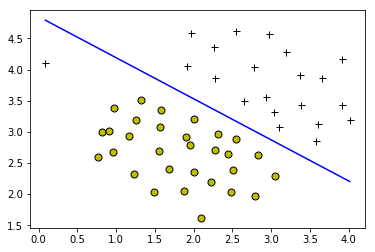

In [5]:
C = 1
model = svm.SVC(C,'linear').fit(X, y)
w = model.coef_.flatten()
b = model.intercept_
xp = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
yp = - (w[0] * xp + b) / w[1]
plot_data(X, y)
plt.plot(xp, yp, '-b');

## Part 3: Implementing Gaussian Kernel
### Gaussian kernel function
$$\large K_{gaussian}(x^{(i)},x^{(j)})=\text{exp}\left(-\frac{||x^{(i)}-x^{(j)}||^2}{2\sigma^2}\right)=\left(-\frac{\sum_{k=1}^{n}\left(x_k^{(i)}-x_k^{(j)}\right)^2}{2\sigma^2}\right)$$

In [6]:
def gaussian_kernel(x1, x2, sigma):
    diff = x1 - x2
    return np.exp(- diff.T @ diff / (2 * sigma ** 2))

Evaluating the Gaussian Kernel ...

In [7]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
sim = gaussian_kernel(x1, x2, sigma)
print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = %f :\n\t%f\n(for sigma = 2, this value should be about 0.324652)' % (sigma, sim))

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2.000000 :
	0.324652
(for sigma = 2, this value should be about 0.324652)


## Part 4: Visualizing Dataset 2
Loading and Visualizing Data ...

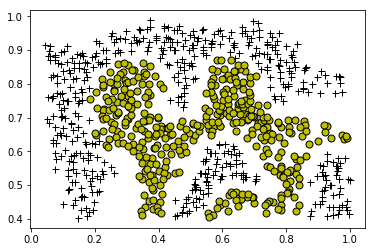

In [8]:
data = sio.loadmat('ex6data2.mat', squeeze_me=True)
X = data['X']
y = data['y']
plot_data(X, y)

## Part 5: Training SVM with RBF Kernel (Dataset 2)
Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...

In [9]:
def visualize_boundary(X, y, model):
    x1plot = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
    x2plot = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = model.predict(np.vstack([X1.ravel(),X2.ravel()]).T).reshape(X1.shape)
    plt.contour(X1, X2, vals, [0.5], colors='b')

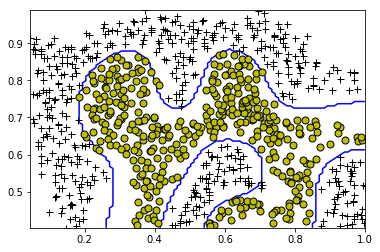

In [10]:
C = 1
sigma = 0.1
model = svm.SVC(C,'rbf', gamma=1/(2 * sigma ** 2)).fit(X, y)
plot_data(X, y)
visualize_boundary(X, y, model)

## Part 6: Visualizing Dataset 3
Loading and Visualizing Data ...

In [11]:
data = sio.loadmat('ex6data3.mat', squeeze_me=True)
X = data['X']
y = data['y']

## Part 7: Training SVM with RBF Kernel (Dataset 3)

In [12]:
def dataset3_params(X, y, Xval, yval):
    steps = np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30])
    param_grid = {'C': steps,
                  'gamma': 1/(2 * steps ** 2)}
    model = svm.SVC(kernel='rbf')
    X_tt = np.vstack([X , Xval])
    y_tt = np.hstack([y, yval])
    custom_cv = [(np.arange(X.shape[0]), np.arange(X.shape[0],X.shape[0] + Xval.shape[0]))]
    grid = GridSearchCV(model, param_grid, cv=custom_cv)
    grid.fit(X_tt, y_tt)
    return grid.best_params_

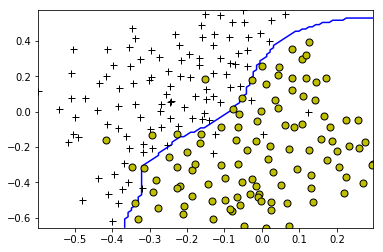

In [13]:
data = sio.loadmat('ex6data3.mat', squeeze_me=True)
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
plot_data(X, y)
best_params = dataset3_params(X, y, Xval, yval)
model = svm.SVC(best_params['C'],'rbf', gamma=best_params['gamma']).fit(X, y)
visualize_boundary(X, y, model)

# Ex6_spam

## Part 1: Email Preprocessing
Preprocessing sample email (emailSample1.txt)

In [14]:
import re
import nltk

def get_vocab_list():
    vocab_list = {}
    with open('vocab.txt', 'r') as f:
        for i, line in enumerate(f):
            _, vocab = line.split()
            vocab_list[vocab] = i
    return vocab_list


def process_email(email_contents):
    vocab_list = get_vocab_list()
    word_indices = []
    # Find the Headers ( \n\n and remove )
    # Uncomment the following lines if you are working with raw emails with the
    # full headers
    # hdrstart = email_contents.find('\n\n')
    # email_contents = email_contents[hdrstart:]
    
    email_contents = email_contents.casefold()
    email_contents = re.sub(r'<[^<>]+>', ' ', email_contents)
    email_contents = re.sub(r'[0-9]+', 'number', email_contents)
    email_contents = re.sub(r'(http|https)://[^\s]*', 'httpaddr', email_contents)
    email_contents = re.sub(r'[^\s]+@[^\s]+', 'emailaddr', email_contents)
    email_contents = re.sub(r'[\$]+', 'dollar', email_contents)
    
    print('==== Processed Email ====')
    ps = nltk.stem.porter.PorterStemmer(mode='MARTIN_EXTENSIONS')
    pattern = r'[\s@\$/#\.\-:&\*\+=\[\]\?!\(\)\{\},">_<;%\n\r' + r"']"
    l = 0
    while email_contents:
        strtok = re.split(pattern,email_contents,1)
        str_ = strtok[0]
        email_contents = strtok[1]
        str_ = re.sub(r'[^a-zA-Z0-9]', '', str_)
        str_ = ps.stem(str_.strip())
        i = vocab_list.get(str_)
        if not str_:
            continue
        if i:
            word_indices.append(i)
        if l + len(str_) + 1 > 78:
            print('')
            l = 0
        print(f'{str_}', end=' ')
        l += len(str_) +1
    print('\n\n=========================')
    return word_indices


def email_features(word_indices):
    n = 1899
    x = np.zeros(n)
    for word in word_indices:
        x[word] = 1
    return x

In [15]:
with open('emailSample1.txt', 'r') as f:
    file_contents = f.read()
word_indices = process_email(file_contents)
print('Word Indices: ');
print(word_indices,'\n')

==== Processed Email ====
anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Word Indices: 
[85, 915, 793, 1076, 882, 369, 1698, 789, 1821, 1830, 882, 430, 1170, 793, 1001, 1892, 1363, 591, 1675, 237, 161, 88, 687, 944, 1662, 1119, 1061, 1698, 374, 1161, 478, 1892, 1509, 798, 1181, 1236, 809, 1894, 1439, 1546, 180, 1698, 1757, 1895, 687, 1675, 991, 960, 1476, 70, 529, 1698, 530] 



## Part 2: Feature Extraction
Extracting features from sample email (emailSample1.txt)

In [16]:
with open('emailSample1.txt', 'r') as f:
    file_contents = f.read()
word_indices = process_email(file_contents)
features = email_features(word_indices)
print(f'Length of feature vector: {len(features)}')
print(f'Number of non-zero entries: {np.sum(features > 0)}')

==== Processed Email ====
anyon know how much it cost to host a web portal well it depend on how mani 
visitor you re expect thi can be anywher from less than number buck a month 
to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb 
if your run someth big to unsubscrib yourself from thi mail list send an 
email to emailaddr 

Length of feature vector: 1899
Number of non-zero entries: 45


## Part 3: Train Linear SVM for Spam Classification
Training Linear SVM (Spam Classification)<br>
(this may take 1 to 2 minutes) ...

In [21]:
data = sio.loadmat('spamTrain.mat', squeeze_me=True)
X = data['X']
y = data['y']
C = 0.1
model = svm.SVC(C,'linear').fit(X, y)
p = model.predict(X)
print('Training Accuracy: %f' % np.mean((p == y) * 100))

(4000, 1899)
Training Accuracy: 99.825000


## Part 4: Test Spam Classification
Evaluating the trained Linear SVM on a test set ...

In [18]:
data = sio.loadmat('spamTest.mat', squeeze_me=True)
Xtest = data['Xtest']
ytest = data['ytest']
p = model.predict(Xtest)
print('Training Accuracy: %f' % np.mean((p == ytest) * 100))

Training Accuracy: 98.900000


## Part 5: Top Predictors of Spam

In [19]:
idx = np.argsort(model.coef_)
vocab_list = get_vocab_list()
vocab_list = {v: k for k, v in vocab_list.items()}
print('Top predictors of spam:')
for i in idx.ravel()[:-16:-1]:
    print('%-15s (%f)' % (vocab_list[i], model.coef_[0, i]))

Top predictors of spam:
our             (0.500614)
click           (0.465916)
remov           (0.422869)
guarante        (0.383622)
visit           (0.367710)
basenumb        (0.345064)
dollar          (0.323632)
will            (0.269724)
price           (0.267298)
pleas           (0.261169)
most            (0.257298)
nbsp            (0.253941)
lo              (0.253467)
ga              (0.248297)
hour            (0.246404)


## Part 6: Try Your Own Emails

In [22]:
filename = 'spamSample1.txt'
with open(filename, 'r', encoding='utf-8') as f:
    file_contents = f.read()
word_indices = process_email(file_contents)
x = email_features(word_indices)
p = model.predict(x.reshape(1,-1))
print('Processed %s\n\nSpam Classification: %d' % (filename, p))
print('(1 indicates spam, 0 indicates not spam)');

==== Processed Email ====
do you want to make dollarnumb or more per week if you ar a motiv and qualifi 
individu i will person demonstr to you a system that will make you dollarnumb 
number per week or more thi is not mlm call our number hour pre record number 
to get the detail number number number i need peopl who want to make seriou 
monei make the call and get the fact invest number minut in yourself now 
number number number look forward to your call and i will introduc you to 
peopl like yourself who ar current make dollarnumb number plu per week number 
number number numberljgvnumb numberleannumberlrmsnumb 
numberwxhonumberqiytnumb numberrjuvnumberhqcfnumb numbereidbnumberdmtvlnumb 

Processed spamSample1.txt

Spam Classification: 1
(1 indicates spam, 0 indicates not spam)
